### Conditionals (`if` statements)

We can perform true/false tests, like comparing two numbers or checking whether two strings are equal. The code below gives the example of comparing two numbers.
```
3 > 2
```

In [2]:
3 > 2

True

These `True` / `False` results are a data type called `bool`, short for Boolean, which refers to a systematic approach to this sort of true/false logic.

In Boolean logic, true/false values can be combined using _and_ and *or*, and transformed using _not_. Python has exact equivalents of these, allowing us to build more complex tests. Note that Python's `or` is "inclusive", that is, `a or b` is `true` when at least one of `a` or `b` are true, including when both are true.
```
print( 3 > 2 and 3 < 4 )
print( 3 > 2 or  3 < 4 )
print( 3 > 2 and 3 < 1 )
```

In [3]:
print( 3 > 2 and 3 < 4 )
print( 3 > 2 or  3 < 4 )
print( 3 > 2 and 3 < 1 )

True
True
False


To test whether two values are equal to each other, we use a double equal sign symbol, `==`. This symbol distinguishes _testing_ whether two values are equal from _assigning_ a value to a variable, which uses a single equal sign (_e.g._, `x = 3`).

For instance, we can compare integers and strings as shown below
```
print(3 == 4)
print(2*2 == 4)
print('4' == 4)
print('4' == str(4))
```

In [4]:
print(3 == 4)
print(2*2 == 4)
print('4' == 4)
print('4' == str(4))

False
True
False
True


The `!=` operator tests whether two values are not equal, like this
```
print(3 != 4)
```

In [5]:
print(3 != 4)

True


An `if` statement runs the Python code in its _body_ when a **condition** is `True`, and skips it when the condition is `False`. The body of the `if` statement is indented, like the body of a `for` statement.

```
if x > 0:
    print('x is positive!')
```

We'll test this with a positive value for `x` and a negative value. Then, we'll add a second `if` statement to print a different message when `x` is negative.

In [6]:
x = 3
if x > 0:
    print('x is positive!')

if x < 0:
    print('x is negative!')

x is positive!


We can do more than just `print()` something in the body of an `if` statement. For instance, we can change the value of a variable and then use that variable outside the `if` statement.
```
sign = 'zero'
if x > 0:
    sign = 'positive'
```

In [7]:
x = -2
sign = 'zero'

if x < 0:
    sign = 'negative'

if x > 0:
    sign = 'positive'
    
sign

'negative'

In the examples above, we're picking between one of a few alternatives. We can use a special "if-else" construction to do this more easily. In this example, `elif` is short for else-if.
```
nt = 'C'
if nt == 'A':
    base = 'Adenine'
elif nt == 'C':
    base = 'Cytosine'
elif nt == 'G':
    base = 'Guanine'
elif nt == 'T':
    base = 'Thymine'
```
We can also add an `else` clause that is run when none of the other alternatives are.
```
else:
    base = 'Unknown'
```

In [8]:
nt = 'C'
if nt == 'A':
    base = 'Adenine'
elif nt == 'C':
    base = 'Cytosine'
elif nt == 'G':
    base = 'Guanine'
elif nt == 'T':
    base = 'Thymine'
else:
    base = 'Unknown'

base

'Cytosine'

We can also combine `if` and `for` to carry out complex operations.

The recognition sequence for the restriction enzyme EcoRI is G/AATTC. Here we will use a `for` loop to iterate over each nucleotide in this site and print the name of the base.

```
ecori = 'GAATTC'
for nt in ecori:
    if nt == 'A':
    ...
    print(base)
```

In [9]:
ecori = 'GAATTC'
for nt in ecori:
    if nt == 'A':
        base = 'Adenine'
    elif nt == 'C':
        base = 'Cytosine'
    elif nt == 'G':
        base = 'Guanine'
    elif nt == 'T':
        base = 'Thymine'
    else:
        base = 'Unknown'
    print(base)

Guanine
Adenine
Adenine
Thymine
Thymine
Cytosine


_Exercise_ The cell below defines a variable `mfa1` that holds the protein sequence of the yeast gene _MFA1_, encoding a secreted mating pheromone.

Write a `for` loop to count the number of lysine residues (one-letter code `K`) in `mfa1`.

In [10]:
mfa1='MQPSTATAAPKEKTSSEKKDNYIIKGVFWDPACVIA'

### Dictionaries

**Dictionaries**, often called **dicts** for short, are useful and versatile data structures that link a _key_ with a _value_. It's fast and easy to look up the _value_ based on the _key_, like you look up a definition from a word in a dictionary. 

Dictionaries have one entry per key, and keys can be almost anything -- numbers, strings, and so forth.

The code below creates a dictionary where the _keys_ are one-letter amino acid codes and the _values_ are the names of the amino acid.

```
amino_acids = { 'A': 'alanine', 'C': 'cysteine', 'D': 'aspartic acid' }
```

In [11]:
amino_acids = { 'A': 'alanine', 'C': 'cysteine', 'D': 'aspartic acid' }
amino_acids

{'A': 'alanine', 'C': 'cysteine', 'D': 'aspartic acid'}

Looking up dictionary entries is done by _indexing_ wiht square brackets, just as we saw for lists. An example is given below

```
amino_acids['C']
```

In [12]:
amino_acids['C']

'cysteine'

Indexing can also be used to add or replace entries. For example, the code below replaces the name of protonated aspartic acid with the deprotonated form typically found in water, and also adds an entry for glutamate.

```
amino_acids['D'] = 'aspartate'
amino_acids['E'] = 'glutamate'
```

In [13]:
amino_acids['D'] = 'aspartate'
amino_acids['E'] = 'glutamate'
amino_acids

{'A': 'alanine', 'C': 'cysteine', 'D': 'aspartate', 'E': 'glutamate'}

Dictionaries are another kind of **collection**, and so we can iterate over them. A `for` loop will iterate over the _keys_ in a dictionary.
```
for aa in amino_acids:
    print(aa)
```

In [14]:
for aa in amino_acids:
    print(aa)

A
C
D
E


It's straightforward to use the keys in a for loop to look up the values.
```
for aa in amino_acids:
    print(amino_acids[aa])
```

In [15]:
for aa in amino_acids:
    print(amino_acids[aa])

alanine
cysteine
aspartate
glutamate


Dictionaries also have an `items()` method that iterates over keys and values _together_.

This requires _two_ loop variables, one for the key and one for the value. These two loop variables are separated with a comma, as shown below:

```
for key, value in amino_acids.items():
    print(key)
    print(value)
```

In [16]:
for key, value in amino_acids.items():
    print(key)
    print(value)

A
alanine
C
cysteine
D
aspartate
E
glutamate


There's an operator called `in` that tests whether a key is contained in a dictionary. For example, the code below tests whether 'B' is a key in our dictionary of amino acids.

```
'B' in amino_acids
```

In [17]:
'C' in amino_acids

True

The `del` operator will delete an entry from a dictionary. Here is an example of using `del`
```
del amino_acids['C']
```

In [18]:
del amino_acids['C']
print(amino_acids)
'C' in amino_acids

{'A': 'alanine', 'D': 'aspartate', 'E': 'glutamate'}


False

### Counting with dictionaries

Dictionaries are useful for counting things. We counted the occurrences of lysine in one small yeast protein. Now, we're going to count all amino acids in the protein.

The basic strategy is to create an empty dictionary, and then update the entries to keep a running count of the number of times we see each amino acid.
```
mfa1 = 'MQPSTATAAPKEKTSSEKKDNYIIKGVFWDPACVIA'
aa_count = {}
for aa in mfa1:
    aa_count[aa] = aa_count[aa] + 1
    print(aa_count)
```

In [19]:
mfa1 = 'MQPSTATAAPKEKTSSEKKDNYIIKGVFWDPACVIA'
aa_count = {}
for aa in mfa1:
    aa_count[aa] = aa_count[aa] + 1
    print(aa_count)

KeyError: 'M'

_But_ this code gives us an error.

We need to do something special when we see an amino acid for the first time. There are two ways to handle this situation. One is to test whether an amino acid is already in the dictionary, and add the amino acid if it isn't already there.
```
    ...
    if not (aa in aa_count):
        aa_count[aa] = 0
    ...
```

In [ ]:
aa_count = {}
for aa in mfa1:
    if not (aa in aa_count):
        aa_count[aa] = 0
    aa_count[aa] = aa_count[aa] + 1
    print(aa_count)

Another is to use the `get()` method instead of indexing with square brackets. This method looks up a key and returns its value, or uses the default value when the key is absent.

Here's an example with a dictionary of nucleoside names.

```
nucleotides = { 'A': 'adenosine', 'C': 'cytidine', 'G': 'guanosine', 'T': 'thymidine' }
print('A is ' + nucleotides.get('A', 'unknown'))
print('E is ' + nucleotides.get('E', 'unknown'))
```

In [ ]:
nucleotides = { 'A': 'adenosine', 'C': 'cytidine', 'G': 'guanosine', 'T': 'thymidine' }
print('A is ' + nucleotides.get('A', 'unknown'))
print('E is ' + nucleotides.get('E', 'unknown'))

We can use the `get()` method to write a shorter and clearer version of our counting loop.
```
    ...
    aa_count[aa] = aa_count.get(aa, 0) + 1
    ...
```

In [ ]:
aa_count = {}
for aa in mfa1:
    aa_count[aa] = aa_count.get(aa, 0) + 1
print(aa_count)

### BioPython

Next, we'll move on to counting amino acids in the whole yeast proteome. We don't want to include all ~6,000 protein sequences in this notebook, and so we'll use existing Python tools to read it from a file. First, we need to install the biopython package.

Doing this within a Jupyter notebook requires the following, somewhat cryptic python code that I copied and pasted from an informative web page

```
import sys
!{sys.executable} -m pip install biopython
```

In [ ]:
import sys
!{sys.executable} -m pip install biopython

The biopython module `Bio` has a sub-module specialized for reading and writing files of sequence data, called `SeqIO`. The code below imports this one sub-module.

```
from Bio import SeqIO
```

In [20]:
from Bio import SeqIO

The SeqIO module has a function called `parse()` that reads sequence entries from a Fasta-format file. The Fasta format is pretty simple: each sequence has a name on a line starting with a >, followed by the sequence itself. So, a Fasta file might look like:

```
>one
AGCTACGT...
>two
TGACTGCA...
...
```

The `parse()` function returns, in essence, an iterator that can loop over all the entries in the file. We just want to look at the first one, though, so we'll use `next` to take just one entry.

```
proteins = SeqIO.parse("../S288C_R64-2-1/orf_trans_all_R64-2-1_20150113.fasta", "fasta")
protein = next(proteins)
```

In [21]:
proteins = SeqIO.parse("../S288C_R64-2-1/orf_trans_all_R64-2-1_20150113.fasta", "fasta")
protein = next(proteins)
protein

SeqRecord(seq=Seq('MVLTIYPDELVQIVSDKIASNKGKITLNQLWDISGKYFDLSDKKVKQFVLSCVI...ST*', SingleLetterAlphabet()), id='YAL001C', name='YAL001C', description='YAL001C TFC3 SGDID:S000000001, Chr I from 151006-147594,151166-151097, Genome Release 64-2-1, reverse complement, Verified ORF, "Subunit of RNA polymerase III transcription initiation factor complex; part of the TauB domain of TFIIIC that binds DNA at the BoxB promoter sites of tRNA and similar genes; cooperates with Tfc6p in DNA binding; largest of six subunits of the RNA polymerase III transcription initiation factor complex (TFIIIC)"', dbxrefs=[])

The `parse()` function will turn each of these into a `SeqRecord`, a custom data type that bundles together the name and the sequence. You can get the sequence name from record using `record.id` and the sequence itself using `record.seq`. This sequence isn't an ordinary Python string -- it's another custom data type, called a `Seq`, but you can convert it into a string using `str(record.seq)`.

```
print('ID = ' + protien.id)
print('Seq = ' + str(protein.seq))
```

In [22]:
print('ID = ' + protein.id)
print('Seq = ' + str(protein.seq))

ID = YAL001C
Seq = MVLTIYPDELVQIVSDKIASNKGKITLNQLWDISGKYFDLSDKKVKQFVLSCVILKKDIEVYCDGAITTKNVTDIIGDANHSYSVGITEDSLWTLLTGYTKKESTIGNSAFELLLEVAKSGEKGINTMDLAQVTGQDPRSVTGRIKKINHLLTSSQLIYKGHVVKQLKLKKFSHDGVDSNPYINIRDHLATIVEVVKRSKNGIRQIIDLKRELKFDKEKRLSKAFIAAIAWLDEKEYLKKVLVVSPKNPAIKIRCVKYVKDIPDSKGSPSFEYDSNSADEDSVSDSKAAFEDEDLVEGLDNFNATDLLQNQGLVMEEKEDAVKNEVLLNRFYPLQNQTYDIADKSGLKGISTMDVVNRITGKEFQRAFTKSSEYYLESVDKQKENTGGYRLFRIYDFEGKKKFFRLFTAQNFQKLTNAEDEISVPKGFDELGKSRTDLKTLNEDNFVALNNTVRFTTDSDGQDIFFWHGELKIPPNSKKTPNKNKRKRQVKNSTNASVAGNISNPKRIKLEQHVSTAQEPKSAEDSPSSNGGTVVKGKVVNFGGFSARSLRSLQRQRAILKVMNTIGGVAYLREQFYESVSKYMGSTTTLDKKTVRGDVDLMVESEKLGARTEPVSGRKIIFLPTVGEDAIQRYILKEKDSKKATFTDVIHDTEIYFFDQTEKNRFHRGKKSVERIRKFQNRQKNAKIKASDDAISKKSTSVNVSDGKIKRRDKKVSAGRTTVVVENTKEDKTVYHAGTKDGVQALIRAVVVTKSIKNEIMWDKITKLFPNNSLDNLKKKWTARRVRMGHSGWRAYVDKWKKMLVLAIKSEKISLRDVEELDLIKLLDIWTSFDEKEIKRPLFLYKNYEENRKKFTLVRDDTLTHSGNDLAMSSMIQREISSLKKTYTRKISASTKDLSKSQSDDYIRTVIRSILIESPSTTRNEIEALKNVGNESIDNVIMDMAKEKQIYLHGSKLECTDTLPDILENRGNYKDFGVAFQ

Now let's run our amino acid counting loop on this protein.
```
...
for aa in str(protein.seq):
    ...
```

In [23]:
aa_count = {}
for aa in str(protein.seq):
    aa_count[aa] = aa_count.get(aa, 0) + 1
print(aa_count)

{'M': 17, 'V': 87, 'L': 97, 'T': 75, 'I': 87, 'Y': 35, 'P': 30, 'D': 79, 'E': 73, 'Q': 37, 'S': 97, 'K': 125, 'A': 52, 'N': 66, 'G': 59, 'W': 15, 'F': 42, 'C': 7, 'H': 16, 'R': 64, '*': 1}


Finally, lets loop over every protein in the proteome and count all of the amino acids.
```
proteins = SeqIO.parse("../S288C_R64-2-1/orf_trans_all_R64-2-1_20150113.fasta", "fasta")
...
for protein in proteins:
    ...
```

In [24]:
proteins = SeqIO.parse("../S288C_R64-2-1/orf_trans_all_R64-2-1_20150113.fasta", "fasta")
aa_count = {}
for protein in proteins:
    for aa in str(protein.seq):
        aa_count[aa] = aa_count.get(aa, 0) + 1
print(aa_count)

{'M': 63456, 'V': 168498, 'L': 289192, 'T': 178461, 'I': 198360, 'Y': 102230, 'P': 132450, 'D': 173876, 'E': 194277, 'Q': 118175, 'S': 273472, 'K': 219640, 'A': 165323, 'N': 184437, 'G': 149491, 'W': 31565, 'F': 136324, 'C': 39841, 'H': 65849, 'R': 134591, '*': 6743}


What are the most and least common amino acids?

### Pandas

Dictionaries are great tools, but it's tedious to read a dictionary. Pandas is the Python Data Analysis library, a module that is excellent for many kinds of data analysis. We'll import Pandas to start working with it.
```
import pandas as pd
```

In [25]:
import pandas as pd

We can use our dictionary of counts to create a Pandas `Series`, which is a list of data values with a label for each entry. For us, the labels are the amino acids and the data values are the counts. We can create a `Series` directly from our dictionary using the `pd.Series()` function.
```
aa_series = pd.Series(aa_count)
```

In [26]:
aa_series = pd.Series(aa_count)
aa_series

M     63456
V    168498
L    289192
T    178461
I    198360
Y    102230
P    132450
D    173876
E    194277
Q    118175
S    273472
K    219640
A    165323
N    184437
G    149491
W     31565
F    136324
C     39841
H     65849
R    134591
*      6743
dtype: int64

Our `aa_series` is still in an arbitrary order. The `Series` type has two sorting methods. `Series.sort_index()` sorts the series by its index (here, by the amino acid) and `Series.sort_values()` sorts the series by the data values.
```
print(aa_series.sort_index())
print(aa_series.sort_values())
```
These output tables are useful for answering questions like "how many glycines are there in the yeast genome" or "what are the most and least common amino acids"?

In [27]:
print(aa_series.sort_index())
print(aa_series.sort_values())

*      6743
A    165323
C     39841
D    173876
E    194277
F    136324
G    149491
H     65849
I    198360
K    219640
L    289192
M     63456
N    184437
P    132450
Q    118175
R    134591
S    273472
T    178461
V    168498
W     31565
Y    102230
dtype: int64
*      6743
W     31565
C     39841
M     63456
H     65849
Y    102230
Q    118175
P    132450
R    134591
F    136324
G    149491
A    165323
V    168498
D    173876
T    178461
N    184437
E    194277
I    198360
K    219640
S    273472
L    289192
dtype: int64


### matplotlib

It's also pretty easy to make plots of data in a `Series`. To do this, we need to import another module
```
import matplotlib.pyplot as plt
```

In [28]:
import matplotlib.pyplot as plt 

Now, we can use a `plot()` method on our data series. The default plot is a line plot, but a bar plot makes more sense for this kind of data and so we use the `kind='bar'` argument to the `Series.plot()` method.
```
aa_series.plot(kind='bar')
```
You may find it makes more sense to plot the sorted versions of these `Series`

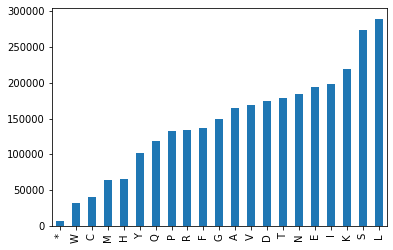

In [29]:
aa_series.sort_values().plot(kind='bar')

_Exercise_ The file `"../S288C_R64-2-1/S288C_reference_sequence_R64-2-1_20150113.fsa"` has the nucleotide sequence of the yeast genome. Count the nucleotide frequencies in the genome.

A    3766349
C    2320576
G    2317100
T    3753080
dtype: int64


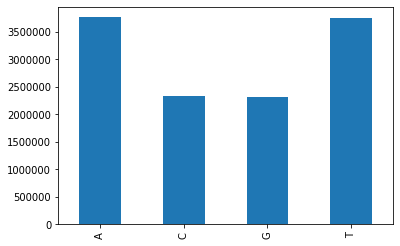

In [33]:
chroms = SeqIO.parse("../S288C_R64-2-1/S288C_reference_sequence_R64-2-1_20150113.fsa", "fasta")
nt_count = {}
for chrom in chroms:
    for nt in str(chrom.seq):
        nt_count[nt] = nt_count.get(nt, 0) + 1
nt_series = pd.Series(nt_count)
print(nt_series.sort_index())
nt_series.sort_index().plot(kind='bar')
 

_Exercise, continued_ Now count the pairs of adjacent nucle

### Data frames

In addition to the `Series`, Pandas also provides a `DataFrame` which has rows and columns, like a table or a spreadsheet. They're similar to (and based on) data frames in the statistics programming language R.

We can build a data frame from a dictionary where the _columns_ are entries in a dictionary. Each dictionary _key_ is a column header, and the associated _value_ is a list. The `pd.DataFrame()` function creates a data frame.

```
nucls = pd.DataFrame({'letter': [ 'A', 'C', 'G', 'T' ],
                      'name': ['adenine', 'cytosine', 'guanine', 'thymine'],
                      'ring': ['purine', 'pyrimidine', 'purine', 'pyrimidine']})
```

In [12]:
import pandas as pd
nucls = pd.DataFrame({'letter': [ 'A', 'C', 'G', 'T' ],
                      'name': ['adenine', 'cytosine', 'guanine', 'thymine'],
                      'ring': ['purine', 'pyrimidine', 'purine', 'pyrimidine']})
print(nucls)

  letter      name        ring
0      A   adenine      purine
1      C  cytosine  pyrimidine
2      G   guanine      purine
3      T   thymine  pyrimidine


We can extract one column of a `DataFrame` as a `Series` using square brackets to index it by the name of the column:
```
nucls['name']
```

In [18]:
type(nucls['letter'])

pandas.core.series.Series

We can then index by row into the `Series` with a second set of square brackets
```
nucls['letter'][2]
```


In [19]:
nucls['letter'][2]

'G'

Here is some Python code to create a data frame with observed nucleotide counts from 389 TATA boxes taken from eukaryotic promoters (Bucher, J Mol Biol (1990) 212, 563-578).
```
tata_counts = pd.DataFrame({'A': [  16, 352,   3, 354, 268, 360, 222, 155],
                            'C': [  46,   0,  10,   0,   0,   3,   2,  44],
                            'G': [  18,   2,   2,   5,   0,  20,  44, 157],
                            'T': [ 309,  35, 374,  30, 121,   6, 121,  33]})
```
Each row is a position in the TATA motif, and each column is a nucleotide. It's possible to read off the consensus sequence of TATA(A/T)A(A/T)(A/G), sometimes written TATAWAWR, just from looking at the counts in the table.

In [6]:
tata_counts = pd.DataFrame({'A': [  16, 352,   3, 354, 268, 360, 222, 155],
                            'C': [  46,   0,  10,   0,   0,   3,   2,  44],
                            'G': [  18,   2,   2,   5,   0,  20,  44, 157],
                            'T': [ 309,  35, 374,  30, 121,   6, 121,  33]})
tata_counts

,A,C,G,T
0,16,46,18,309
1,352,0,2,35
2,3,10,2,374
3,354,0,5,30
4,268,0,0,121
5,360,3,20,6
6,222,2,44,121
7,155,44,157,33


Data frames have many useful methods. For instance, we can use the .sum() method to take the sums across rows or columns. The argument `0` will calculate column sums and the argument `1` will calculate row sums.

In [10]:
tata_counts.sum(1)

0    389
1    389
2    389
3    389
4    389
5    389
6    389
7    389
dtype: int64

We can then turn these counts into probabilities by dividing each nucleotide count by the total number of sequences counted. That is if 35 out of 389 TATA-box sequences have a `T` at the second position, then the probability of a `T` at position 1 in a random TATA-box sequence is 35/389, just under 10%.

```
tata_counts / 389
```

will make a new data frame dividing each individual entry in our data frame by 389. We'll use this to make a new `tata_probs` data frame with the _probabilities_ of each nucleotide.

In [20]:
tata_probs = tata_counts / 389
tata_probs

,A,C,G,T
0,0.041131,0.118252,0.046272,0.794344
1,0.904884,0.000000,0.005141,0.089974
2,0.007712,0.025707,0.005141,0.961440
3,0.910026,0.000000,0.012853,0.077121
4,0.688946,0.000000,0.000000,0.311054
5,0.925450,0.007712,0.051414,0.015424
6,0.570694,0.005141,0.113111,0.311054
7,0.398458,0.113111,0.403599,0.084833


We can now look up, e.g., the probability of a `T` at the second position, which is position 1 in Python counting
```
tata_probs['T'][1]
```

In [22]:
tata_probs['T'][1]

0.08997429305912596

We're most of the way to a probabilistic model of a TATA box. We will assume that each of the nucleotides in the TATA box is independent, so we can multiply these probabilities together
$$P(\;\mathtt{TATAAAG}\;|\;\mathrm{TATA-box}\;) = 
P(\;\mathtt{T}\mathrm{\,at\,0\;}) \times
P(\;\mathtt{A}\mathrm{\,at\,1\;}) \times
P(\;\mathtt{T}\mathrm{\,at\,2\;}) \times
P(\;\mathtt{A}\mathrm{\,at\,3\;}) \times
P(\;\mathtt{A}\mathrm{\,at\,4\;}) \times
P(\;\mathtt{A}\mathrm{\,at\,5\;}) \times
P(\;\mathtt{G}\mathrm{\,at\,6\;})
$$

We need to keep track of which position is which, because $P(\;\mathtt{T}\mathrm{\,at\,0\;}) \neq P(\;\mathtt{T}\mathrm{\,at\,1\;})$. The `enumerate()` function lets us keep track of a position when we're iterating over a sequence.

```
for position, nt in enumerate(sequ):
    print('position = ' + str(position) + ', nt = ' + str(nt))
```

In [23]:
sequ = 'TATAAAG'
for position, nt in enumerate(sequ):
    print('position = ' + str(position) + ', nt = ' + str(nt))


position = 0, nt = T
position = 1, nt = A
position = 2, nt = T
position = 3, nt = A
position = 4, nt = A
position = 5, nt = A
position = 6, nt = G


Now, we'll write a `for` loop to iterate over the positions in a sequence and compute a running probability.

We'll start with probability 1
```
prob = 1
```
and then multiply the probability for each independent position
```
for position, nt in enumerate(sequ):
   p = tata_probs[nt][position]
   prob = prob * p
   print(position, nt, p, prob)
```

We can use this to compute the probability of a "very good" TATA-box like `TATATATA`. We can also try the worst possible TATA box, `ACGCGCCT`.

In [27]:
sequ = 'ACGCGCCT'
prob=1

for position, nt in enumerate(sequ):
   p = tata_probs[nt][position]
   prob = prob * p
   print(position, nt, p, prob)
prob

0 A 0.04113110539845758 0.04113110539845758
1 C 0.0 0.0
2 G 0.005141388174807198 0.0
3 C 0.0 0.0
4 G 0.0 0.0
5 C 0.007712082262210797 0.0
6 C 0.005141388174807198 0.0
7 T 0.08483290488431877 0.0


0.0

Our final probability is 0! While $P(\;\mathtt{ACGCGCCT}\;|\;\textrm{TATA-box}\;)$ is definitely very small, it's probably not 0. We see zero `C` nucleotides at position 1 out of 389 TATA-boxes, but what if we counted 389,000? Would we find 100, 10, or 1? 

We often handle these situations by adding a _pseudocount_ to our data. We add a fake count for each nucleotide, at each position, in order to eliminate zeros. The impact of this pseudocount depends on the number of real counts. If we add a pseudocount with 9 real observations, it represents 10% of our overall counts, but if we add a pseudocount with 999 real observations, it's only 0.1%.

We can just add 1 to every entry and use this table with pseudocounts to make our new data.

```
tata_counts_pseudo = tata_counts + 1
```

In [31]:
tata_counts_pseudo = tata_counts + 1
tata_counts_pseudo.sum(1)
tata_probs = tata_counts_pseudo / 393
tata_probs

,A,C,G,T
0,0.043257,0.119593,0.048346,0.788804
1,0.898219,0.002545,0.007634,0.091603
2,0.010178,0.027990,0.007634,0.954198
3,0.903308,0.002545,0.015267,0.078880
4,0.684478,0.002545,0.002545,0.310433
5,0.918575,0.010178,0.053435,0.017812
6,0.567430,0.007634,0.114504,0.310433
7,0.396947,0.114504,0.402036,0.086514


Now we can use the new tata_probs to compute the probability of the best TATA-box, which is pretty similar. We can also compute the worst TATA-box, which is very low but not zero.

In [32]:
sequ = 'ACGCGCCT'
prob=1

for position, nt in enumerate(sequ):
   p = tata_probs[nt][position]
   prob = prob * p
   print(position, nt, p, prob)
prob

0 A 0.043256997455470736 0.043256997455470736
1 C 0.002544529262086514 0.00011006869581544718
2 G 0.007633587786259542 8.402190520263142e-07
3 C 0.002544529262086514 2.1379619644435476e-09
4 G 0.002544529262086514 5.440106779754575e-12
5 C 0.010178117048346057 5.5370043559843004e-14
6 C 0.007633587786259542 4.2267208824307635e-16
7 T 0.08651399491094147 3.656705089125851e-17


3.656705089125851e-17

It's getting tedious to write the same for loop every time we want to try a different sequence.

We can write our own function, `likelihood_tata()`, that will compute the likelihood of a sequence under our TATA-box probability model. We define a function with def followed by the function name. The arguments to the function are named in parentheses, and inside the function, these become variables that take on a different value each time we use the function. The `return` keyword gives the computed "value" for the function.

```
def likelihood_tata(sequ):
    prob = 1
    for position, nt in enumerate(sequ):
        p = tata_probs[nt][position]
        prob = prob * p
        print(position, nt, p, prob)
    return(prob)
```

In [43]:
def likelihood_tata(sequ):
    prob = 1
    for position, nt in enumerate(sequ):
        p = tata_probs[nt][position]
        prob = prob * p
        #print(position, nt, p, prob)
    return(prob)

In [44]:
likelihood_tata('ACGCGCCT')

3.656705089125851e-17

Now we can easily use our function to compute the likelihood of some other possible TATA-box sequences. For example, the three sequences below are "very good" TATA-boxes that differ from the "best" TATA box at one of the three "degenerate" positions in the motif. Notice that the overall probability of getting one of these three imperfect motifs is substantially higher than the probability of the perfect TATA-box. In fact, although the TATA-box is a strong motif, fewer than 10% of the sequences generated according to our model will actually match the "best" sequence.
```
TATATAAG
TATAAATG
TATAAAAA
```

If we want to use our Bayesian framework to think about TATA-boxes, we need some additional information. What is $P(\;\mathtt{TATAAAAG}\;|\;\textit{not}\,\textrm{TATA-box}\;)$? We need a model for all the other sequences in the genome, often called a "background" model.

The easy background model is independent nucleotides, with probabilities determined by the overall composition of the genome. We just counted the overall number of `A`s etc in the yeast genome. A rough estimate is

```
background = pd.Series({'A': 0.31, 'C': 0.19, 'G': 0.19, 'T': 0.31})
```

In [45]:
background = pd.Series({'A': 0.31, 'C': 0.19, 'G': 0.19, 'T': 0.31})
background

A    0.31
C    0.19
G    0.19
T    0.31
dtype: float64

_Exercise_ Use the `background` defined above to write a `likelihood_background()` function that calculates the likelihood of generating a given sequence under the model of random yeast genome.

In [46]:
def likelihood_background(sequ):
    prob = 1
    for position, nt in enumerate(sequ):
        p = background[nt]
        prob = prob * p
        #print(position, nt, p, prob)
    return(prob)

In [47]:
likelihood_background('TATAAAAG')

5.227396681090001e-05

In [48]:
likelihood_background('ACGCGCCT')

4.5211091640999994e-06

Since the "worst" TATA-box is GC-rich and the "best" TATA-box is AT-rich, the odds of getting the "best" TATA-box by chance in random sequence is somewhat higher. Of course, the chance of getting the "best" sequence under our TATA-box probabilistic model is dramatically higher than the chance of getting the "worst" sequence. We can use the _ratio of the likelihoods_ as a measure of how well two different models fit a given sequence.

Below, we compute the likelihood ratios for the "best" sequence TATAAAAG, the "worst" sequence ACGCGCCT, and getting any one of the three very-good sequences TATAAATG and TATAAAAA.
```
print(likelihood_tata('TATAAAAG') / likelihood_background('TATAAAAG'))
print(likelihood_tata('ACGCGCCT') / likelihood_background('ACGCGCCT'))

print( (likelihood_tata('TATATAAG') + likelihood_tata('TATAAATG') + likelihood_tata('TATAAAAA'))
       / (likelihood_background('TATATAAG') + likelihood_background('TATAAATG') + likelihood_background('TATAAAAA')) )
```

In [54]:
print(likelihood_tata('TATAAAAG') / likelihood_background('TATAAAAG'))
print(likelihood_tata('ACGCGCCT') / likelihood_background('ACGCGCCT'))

1675.681948219529
8.088070772902423e-12


We can go one step further and turn this likelihood ratio into a function
```
def likelihood_ratio(sequ):
    return(likelihood_tata(sequ) / likelihood_background(sequ))
```

In [55]:
def likelihood_ratio(sequ):
    return(likelihood_tata(sequ) / likelihood_background(sequ))

In [57]:
likelihood_ratio('TATATAAG')

759.9747125753998

We might want to scan a whole promoter to find a TATA-box. Here is the promoter region for the yeast _CDC19_ gene.
```
cdc19_prm = 'TATGATGCTAGGTACCTTTAGTGTCTTCCTAAAAAAAAAAAAAGGCTCGCCATCAAAACGATATTCGTTGGCTTTTTTTTCTGAATTATAAATACTCTTTGGTAACTTTTCATTTCCAAGAACCTCTTTTTTCCAGTTATATCATG'
```
We need to extract 8-nucleotide chunks out of the promoter. Square brackets can extract a _range_ of values from a string or a list. To do this, we do `[start:end]` where the start is _included_ and the end is _excluded_.

```
alphabet = 'abcdefghijklmnopqrstuvwxyz'
alphabet[2:6]
```

This code goes from index 2 (the 3rd entry, `c`) to index 5 (`f`) and does not include index 6 (`g`).

In [64]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
alphabet[2:6]

'cdef'

We can use this to run
```
likelihood_ratio(cdc19_prm[0:8])
likelihood_ratio(cdc19_prm[1:9])
```

In [67]:
cdc19_prm = 'TATGATGCTAGGTACCTTTAGTGTCTTCCTAAAAAAAAAAAAAGGCTCGCCATCAAAACGATATTCGTTGGCTTTTTTTTCTGAATTATAAATACTCTTTGGTAACTTTTCATTTCCAAGAACCTCTTTTTTCCAGTTATATCATG'

likelihood_ratio(cdc19_prm[0:8])


0.08402037003121614

Now we can loop over each starting position in `cdc19_prm` and compute its likelihood.

We start at position 0 and we run until the _end_ of our 8-position window is at the end of the promoter. This happens when `start+8 = len(cdc19_prm)` or equivalently `start = len(cdc19_prm) - 8`.

The `range(start, end)` function creates a series of numbers.

To start, we can write the loop
```
for start in range(0, len(cdc19_prm) - 8):
    print(str(start) + ' ' + cdc19_prm[start:start+8])
```
and if all of that looks good we can add in a `likelihood_ratio()`.

Then we can build a _list_ of these likelihoods and covert it into a Pandas `Series`.

In [78]:
scores = []
for start in range(0, len(cdc19_prm) - 8):
    subseq = cdc19_prm[start:start+8]
    scores.append(likelihood_ratio(subseq))
pd.Series(scores)
    

0      8.402037e-02
1      1.524301e-05
2      7.856686e-07
3      5.434621e-04
4      8.394749e-05
           ...     
133    7.093968e-02
134    2.845584e-04
135    1.207640e+00
136    4.099739e-05
137    1.812065e+00
Length: 138, dtype: float64

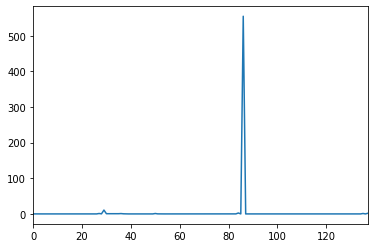

In [85]:
pd.Series(scores).plot()